## Importing Libraries


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [3]:
df = pd.read_csv('customer_data.csv')
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,01-01-2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,02-01-2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,03-01-2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,04-01-2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,05-01-2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


## Data Cleaning

In [4]:
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [5]:
#Transposes the describe
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,2512.0,152443.931131,724.580482,151200.00,151815.7500,152443.500,153071.2500,153699.00
Age,2470.0,46.637652,18.186277,15.00,32.0000,47.000,62.0000,78.00
Referal,2357.0,0.652100,0.476405,0.00,0.0000,1.000,1.0000,1.00
Amount_spent,2270.0,1418.422577,878.507451,2.09,678.1925,1341.435,2038.1025,2999.98


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2044 non-null   object 
 1   Transaction_ID    2044 non-null   int64  
 2   Gender            2044 non-null   object 
 3   Age               2044 non-null   float64
 4   Marital_status    2044 non-null   object 
 5   State_names       2044 non-null   object 
 6   Segment           2044 non-null   object 
 7   Employees_status  2044 non-null   object 
 8   Payment_method    2044 non-null   object 
 9   Referal           2044 non-null   float64
 10  Amount_spent      2044 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 191.6+ KB


In [10]:
#calculating the sum of null values
df.isna().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

In [11]:
#After deleting update the modified value
df.dropna(inplace = True)

In [12]:
df.isna().sum()

Transaction_date    0
Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64

In [14]:
#know the shape of data
df.shape

(2044, 11)

## Analysis

In [17]:
#correlation

correlation = df["Age"].corr(df['Amount_spent'])
print("Correlation : ",correlation)

Correlation :  -0.015198189350010332


In [18]:
#Unique Values -> shows all unique values
df['State_names'].unique()

array(['Kansas', 'Illinois', 'New Mexico', 'Hawaii', 'Connecticut',
       'Florida', 'Vermont', 'California', 'Colorado', 'Iowa',
       'South Carolina', 'New York', 'Maine', 'Maryland', 'Missouri',
       'North Dakota', 'Ohio', 'Nebraska', 'Montana', 'Indiana',
       'Wisconsin', 'Alabama', 'Arkansas', 'Pennsylvania',
       'New Hampshire', 'Washington', 'Texas', 'Kentucky',
       'Massachusetts', 'Wyoming', 'Louisiana', 'North Carolina',
       'Rhode Island', 'West Virginia', 'Tennessee', 'Oregon', 'Alaska',
       'Oklahoma', 'Nevada', 'New Jersey', 'Virginia', 'Michigan', 'Utah',
       'Arizona', 'South Dakota', 'Georgia', 'Idaho', 'Mississippi',
       'Minnesota', 'Delaware'], dtype=object)

In [19]:
#nunique() -> shows no of unique values
df['State_names'].nunique()

50

In [24]:
#Sorting -> ascending(by default)
df.sort_values(by =['Amount_spent']).head(10) #ascending
df.sort_values(by=['Amount_spent']).tail(10) #descending or
df.sort_values(by=['Amount_spent'],ascending = False).head(10)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
17,18-01-2019,151217,Female,77.0,Married,New Mexico,Platinum,workers,Card,0.0,2999.98
485,30-04-2020,151673,Male,65.0,Married,Arizona,Gold,self-employed,PayPal,1.0,2998.62
2279,29-03-2025,153467,Female,78.0,Single,Arizona,Silver,Employees,PayPal,1.0,2997.21
589,12-08-2020,151777,Male,51.0,Single,North Carolina,Missing,Employees,PayPal,1.0,2997.15
743,13-01-2021,151931,Male,44.0,Single,Illinois,Basic,Employees,Card,1.0,2996.82
2367,25-06-2025,153555,Male,39.0,Single,Pennsylvania,Platinum,self-employed,Card,0.0,2995.73
101,12-04-2019,151296,Female,33.0,Married,Virginia,Platinum,Employees,PayPal,0.0,2989.33
1254,08-06-2022,152442,Female,16.0,Married,Nevada,Platinum,workers,Card,1.0,2988.13
1123,28-01-2022,152311,Male,35.0,Married,West Virginia,Silver,workers,Other,1.0,2987.96
1177,23-03-2022,152365,Female,30.0,Single,Michigan,Basic,self-employed,PayPal,0.0,2985.70


In [27]:
# N - Largest -> shows 4 largest values
df.nlargest(4,'Amount_spent')

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
17,18-01-2019,151217,Female,77.0,Married,New Mexico,Platinum,workers,Card,0.0,2999.98
485,30-04-2020,151673,Male,65.0,Married,Arizona,Gold,self-employed,PayPal,1.0,2998.62
2279,29-03-2025,153467,Female,78.0,Single,Arizona,Silver,Employees,PayPal,1.0,2997.21
589,12-08-2020,151777,Male,51.0,Single,North Carolina,Missing,Employees,PayPal,1.0,2997.15


In [28]:
# N - smallest -> show 4 smallest values
df.nsmallest(4,'Amount_spent')

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
2468,04-10-2025,153656,Female,73.0,Married,Michigan,Gold,Employees,PayPal,1.0,2.09
568,22-07-2020,151756,Male,46.0,Single,South Carolina,Gold,workers,PayPal,0.0,2.16
2401,29-07-2025,153589,Female,60.0,Single,Maryland,Silver,Employees,PayPal,1.0,2.84
962,20-08-2021,152150,Female,56.0,Married,Nevada,Basic,workers,Other,1.0,5.31


In [33]:
#conditional queries

# filtering

condition = df['Payment_method'] == 'PayPal'
df[condition].head(10)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
2,03-01-2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
5,06-01-2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
6,07-01-2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
7,08-01-2019,151207,Male,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
10,11-01-2019,151210,Female,56.0,Married,California,Basic,Employees,PayPal,0.0,1712.82
13,14-01-2019,151213,Male,47.0,Single,South Carolina,Basic,Employees,PayPal,1.0,1719.83
16,17-01-2019,151216,Female,72.0,Married,Maine,Silver,self-employed,PayPal,1.0,2882.77
21,22-01-2019,151221,Male,42.0,Married,North Dakota,Silver,workers,PayPal,0.0,995.77
23,24-01-2019,151223,Male,47.0,Single,Nebraska,Basic,self-employed,PayPal,1.0,2407.36
24,25-01-2019,151224,Female,32.0,Single,Montana,Basic,Employees,PayPal,0.0,2737.41


In [31]:
cash_amount = df[condition]['Amount_spent'].sum()
cash_amount

1349548.3199999998

In [34]:
# Females who paid using card
comdition = df['Payment_method'] == 'Card'
female_person = df['Gender'] == 'Female'
df[condition & female_person].head(10)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
6,07-01-2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
10,11-01-2019,151210,Female,56.0,Married,California,Basic,Employees,PayPal,0.0,1712.82
16,17-01-2019,151216,Female,72.0,Married,Maine,Silver,self-employed,PayPal,1.0,2882.77
24,25-01-2019,151224,Female,32.0,Single,Montana,Basic,Employees,PayPal,0.0,2737.41
41,11-02-2019,151241,Female,46.0,Married,New Mexico,Silver,workers,PayPal,1.0,2851.83
42,12-02-2019,151242,Female,16.0,Single,Texas,Gold,self-employed,PayPal,1.0,938.16
43,13-02-2019,151243,Female,63.0,Married,Maine,Gold,workers,PayPal,1.0,281.92
50,20-02-2019,151250,Female,16.0,Married,Maryland,Silver,Employees,PayPal,1.0,583.72
56,26-02-2019,151256,Female,67.0,Single,Iowa,Gold,Employees,PayPal,1.0,611.70
78,20-03-2019,151273,Female,73.0,Married,Alaska,Platinum,self-employed,PayPal,0.0,1364.31


In [35]:
cash_amount = df[condition & female_person]['Amount_spent'].sum()
cash_amount

679583.54

In [37]:
# Group by
df[['Age','Amount_spent']].groupby(df['Gender']).max()

,Age,Amount_spent
Gender,,
Female,78.0,2999.98
Male,78.0,2998.62


In [39]:
df[['Age','Amount_spent']].groupby(df['Gender']).sum()

,Age,Amount_spent
Gender,,
Female,52042.0,1572451.78
Male,43830.0,1349367.45


In [43]:
# Aggregate Function -> sum, avg, max

df[['Amount_spent']].groupby(df['Gender']).agg(['count','sum','max','min'])

Amount_spent                           
              count         sum      max   min
Gender                                        
Female         1099  1572451.78  2999.98  2.09
Male            945  1349367.45  2998.62  2.16

In [44]:
# Grouping by multiple columns

df[['State_names','Gender','Payment_method','Amount_spent']].groupby(['State_names','Gender','Payment_method']).agg(['count','sum','max','min'])

Amount_spent                           
                                         count       sum      max     min
State_names Gender Payment_method                                        
Alabama     Female Card                      6  11476.67  2749.37  413.11
                   Other                     4   6644.05  2789.52  851.25
                   PayPal                    4   4575.81  2520.85   77.90
            Male   Card                      6   5339.42  2735.65  221.17
                   Other                     3   3518.86  1691.62  459.47
...                                        ...       ...      ...     ...
Wyoming     Female Other                     3   4781.37  2674.77  309.82
                   PayPal                   10  12987.52  2960.98   16.27
            Male   Card                      5   5391.08  1784.15  388.65
                   Other                     6   6426.48  2051.04  234.19
                   PayPal                    6  10827.13  2976.07   53.36

[300 rows x 4 columns]

In [45]:
# Cross Tabulation

pd.crosstab(df['Gender'],df['Payment_method'])

Payment_method,Card,Other,PayPal
Gender,,,
Female,350,262,487
Male,253,230,462


In [48]:
# margin = true -> gives grand total

pd.crosstab(df['Gender'],df['Payment_method'],margins = True, margins_name='Total')

Payment_method,Card,Other,PayPal,Total
Gender,,,,
Female,350,262,487,1099
Male,253,230,462,945
Total,603,492,949,2044


In [49]:
# normalize -> shows percentage

pd.crosstab(df['Gender'],df['Payment_method'],margins = True, margins_name='Total', normalize= True)

Payment_method,Card,Other,PayPal,Total
Gender,,,,
Female,0.171233,0.128180,0.238258,0.537671
Male,0.123777,0.112524,0.226027,0.462329
Total,0.295010,0.240705,0.464286,1.000000


## Data Visulaization

In [50]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,01-01-2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,02-01-2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,03-01-2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
5,06-01-2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
6,07-01-2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2044 non-null   object 
 1   Transaction_ID    2044 non-null   int64  
 2   Gender            2044 non-null   object 
 3   Age               2044 non-null   float64
 4   Marital_status    2044 non-null   object 
 5   State_names       2044 non-null   object 
 6   Segment           2044 non-null   object 
 7   Employees_status  2044 non-null   object 
 8   Payment_method    2044 non-null   object 
 9   Referal           2044 non-null   float64
 10  Amount_spent      2044 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 191.6+ KB


In [54]:
# extracting year from transaction_date

df['Date'] = pd.to_datetime(df['Transaction_date'], format='%d-%m-%Y')
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [55]:
df.describe()

,Transaction_ID,Age,Referal,Amount_spent,Year
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,152459.531800,46.904110,0.656556,1429.461463,2021.991194
std,726.325067,18.226739,0.474974,883.615830,1.981787
min,151200.000000,15.000000,0.000000,2.090000,2019.000000
25%,151837.750000,32.000000,0.000000,680.900000,2020.000000
50%,152465.500000,47.000000,1.000000,1357.640000,2022.000000
75%,153094.500000,62.000000,1.000000,2055.587500,2024.000000
max,153699.000000,78.000000,1.000000,2999.980000,2025.000000


In [59]:
# Line Plot -> when periodical data like months, weeks, temp

yearly_sales = df.groupby('Year')['Amount_spent'].sum().reset_index()
yearly_sales

,Year,Amount_spent
0,2019,446538.90
1,2020,398498.56
2,2021,387334.05
3,2022,457701.32
4,2023,415591.92
5,2024,427739.53
6,2025,388414.95


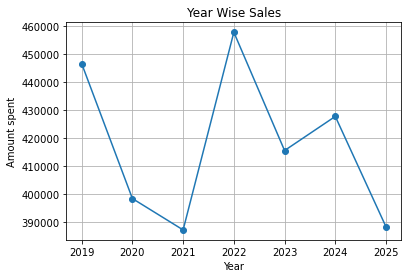

In [69]:
plt.plot(yearly_sales['Year'],yearly_sales['Amount_spent'], marker='o')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Amount spent')
plt.title('Year Wise Sales')
plt.show()

In [71]:
employee_sales = df.groupby('Employees_status')['Amount_spent'].sum().reset_index()
employee_sales

,Employees_status,Amount_spent
0,Employees,1136574.33
1,Unemployment,274660.21
2,self-employed,592929.83
3,workers,917654.86


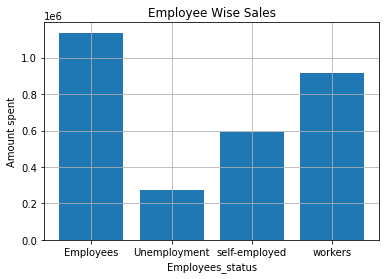

In [76]:
plt.bar(employee_sales['Employees_status'],employee_sales['Amount_spent'])
plt.grid(True)
plt.xlabel('Employees_status')
plt.ylabel('Amount spent')
plt.title('Employee Wise Sales')
plt.show()

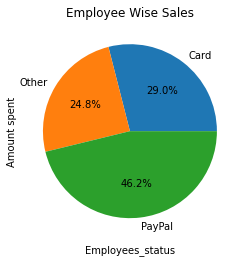

In [78]:
method_sales = df.groupby('Payment_method')['Amount_spent'].sum().reset_index()
plt.pie(method_sales['Amount_spent'], autopct='%1.1f%%', labels=method_sales['Payment_method'])
plt.grid(True)
plt.xlabel('Employees_status')
plt.ylabel('Amount spent')
plt.title('Employee Wise Sales')
plt.show()